In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data Usage Instructions
The code below walks through the cleaning process for the CPS and Housing data. You probably don't really need to know it all. What you do need to know is how to generate the merged data for you to use.

In [144]:
import data_loader

# This script will check whether the data has already been merged and saved, and if not, will merge the data and save it.
# It will then load the data and return it to you
full_df = data_loader.load_data()

full_df

avg_income  avg_prop_tax  \
statefip Date                                      
Alabama  2000-01-31   41917.384970    271.925118   
         2000-02-29   41917.384970    271.925118   
         2000-03-31   41917.384970    271.925118   
         2000-04-30   41917.384970    271.925118   
         2000-05-31   41917.384970    271.925118   
...                            ...           ...   
Wyoming  2024-09-30  104455.891107      0.000000   
         2024-10-31  104455.891107      0.000000   
         2024-11-30  104455.891107      0.000000   
         2024-12-31  104455.891107      0.000000   
         2025-01-31  104455.891107      0.000000   

                     proportion_American Indian/Aleut/Eskimo  \
statefip Date                                                  
Alabama  2000-01-31                                 0.000000   
         2000-02-29                                 0.000000   
         2000-03-31                                 0.000000   
         2000-04-30                                 0.000000   
         2000-05-31                                 0.000000   
...                                                      ...   
Wyoming  2024-09-30                                 0.008195   
         2024-10-31                                 0.008195   
         2024-11-30                                 0.008195   
         2024-12-31                                 0.008195   
         2025-01-31                                 0.008195   

                     proportion_Asian only  proportion_Black  \
statefip Date                                                  
Alabama  2000-01-31               0.000000          0.262985   
         2000-02-29               0.000000          0.262985   
         2000-03-31               0.000000          0.262985   
         2000-04-30               0.000000          0.262985   
         2000-05-31               0.000000          0.262985   
...                                    ...               ...   
Wyoming  2024-09-30               0.007245          0.007625   
         2024-10-31               0.007245          0.007625   
         2024-11-30               0.007245          0.007625   
         2024-12-31               0.007245          0.007625   
         2025-01-31               0.007245          0.007625   

                     proportion_White  total_population  Median Home Price  
statefip Date                                                               
Alabama  2000-01-31          0.737015         706842.48       97080.984792  
         2000-02-29          0.737015         706842.48       97250.037728  
         2000-03-31          0.737015         706842.48       97363.306485  
         2000-04-30          0.737015         706842.48       97617.062414  
         2000-05-31          0.737015         706842.48       97900.085921  
...                               ...               ...                ...  
Wyoming  2024-09-30          0.961807          67792.43      341148.869753  
         2024-10-31          0.961807          67792.43      343849.922709  
         2024-11-30          0.961807          67792.43      346044.040121  
         2024-12-31          0.961807          67792.43      348280.758951  
         2025-01-31          0.961807          67792.43      350224.417540  

[15351 rows x 8 columns]

Once you have loaded the data, you can access individual states using `.loc['<STATENAME>']` and feature time-series within the state by indexing further by name. See code below.

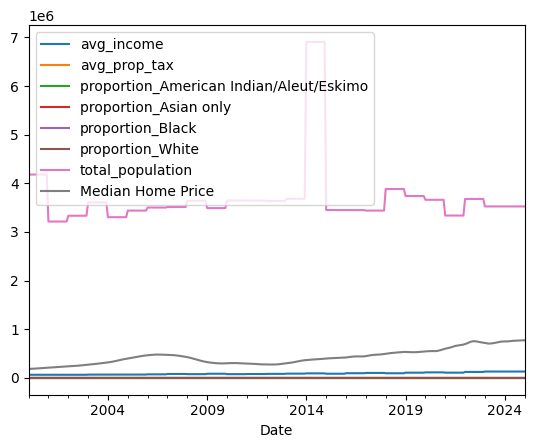

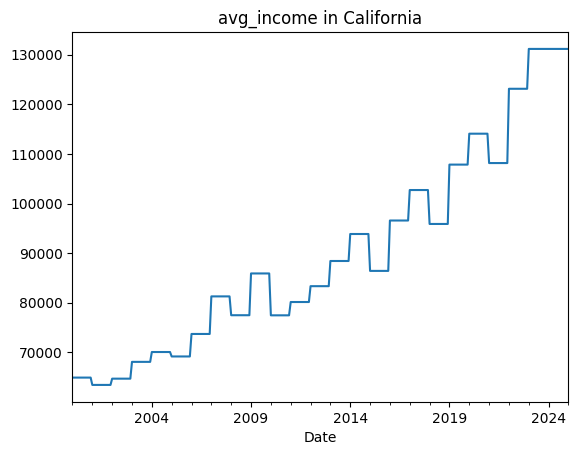

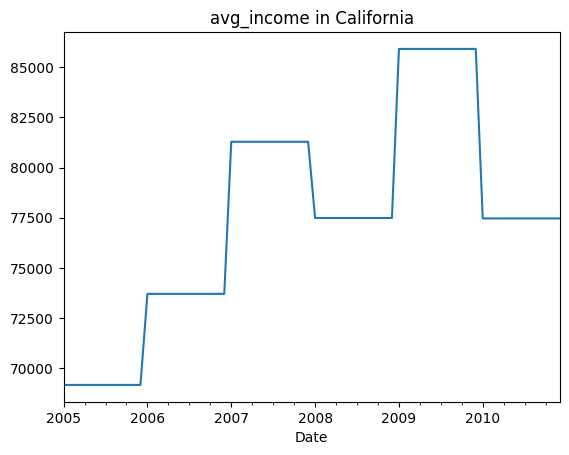

In [147]:
# Access all the data for California
full_df.loc['California'].plot()
plt.show()

# Access only the income data for California
full_df.loc['California']['avg_income'].plot()
plt.title("avg_income in California")
plt.show()

# Access only the income data from 2005-2010 for California
full_df.loc['California']['avg_income']['2005':'2010'].plot()
plt.title("avg_income in California")
plt.show()

You can also group the data by the states to perform operations on each state.

In [156]:
for group, df in full_df.groupby('statefip'):
    print(f"Average income across all years for {group}: {df['avg_income'].mean():.2f}")

Average income across all years for Alabama: 64781.20
Average income across all years for Alaska: 86348.07
Average income across all years for Arizona: 74249.40
Average income across all years for Arkansas: 58315.88
Average income across all years for California: 89703.95
Average income across all years for Colorado: 86211.03
Average income across all years for Connecticut: 93623.43
Average income across all years for Delaware: 77955.04
Average income across all years for District of Columbia: 108392.94
Average income across all years for Florida: 70193.45
Average income across all years for Georgia: 72095.72
Average income across all years for Hawaii: 87014.06
Average income across all years for Idaho: 69013.69
Average income across all years for Illinois: 80886.07
Average income across all years for Indiana: 69711.39
Average income across all years for Iowa: 72356.77
Average income across all years for Kansas: 74965.77
Average income across all years for Kentucky: 62660.22
Average in

You can also get values for all the states in one time period by doing a slice.

<AxesSubplot: ylabel='Frequency'>

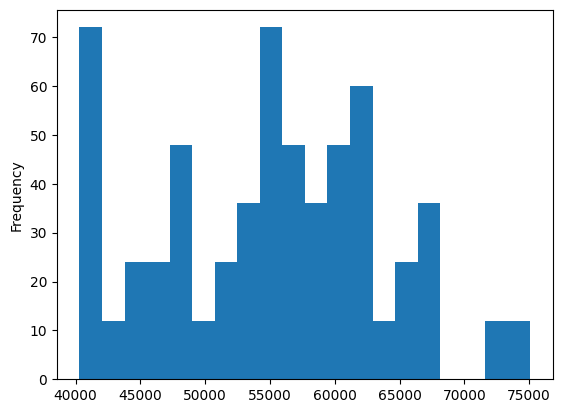

In [175]:
data_2000 = full_df.xs(slice('2000'), level='Date', drop_level=False)
avg_income_2000 = data_2000['avg_income']
avg_income_2000.plot(kind='hist', bins=20) # Histogram of the average income in 2000 across all states

## Cleaning CPS Data

Here we aggregate the data along the year, state, and race, to get the average income, population, and average property tax within.

In [57]:
cps_data = pd.read_stata("cps_data.dta")
to_drop = cps_data[cps_data["pernum"] != 1].index
cps_data = cps_data.drop(to_drop)

cps_data

,year,serial,month,cpsid,asecflag,hflag,asecwth,statefip,county,hhincome,...,nmothers,nfathers,pernum,cpsidv,cpsidp,asecwt,race,marst,bpl,yrimmig
0,2000,41079,March,1.999120e+13,ASEC,NaN,1394.01,Alabama,0,70551.0,...,1,1,1,1.999120e+14,1.999120e+13,1394.01,Black,"Married, spouse present","United States, n.s.",NIU
2,2000,40959,March,1.999120e+13,ASEC,NaN,2206.32,Alabama,0,112000.0,...,0 mothers or NIU,0 fathers or NIU,1,1.999120e+14,1.999120e+13,2206.32,White,Divorced,"United States, n.s.",NIU
3,2000,40986,March,1.999120e+13,ASEC,NaN,2151.73,Alabama,0,41505.0,...,1,1,1,1.999120e+14,1.999120e+13,2151.73,White,"Married, spouse present","United States, n.s.",NIU
7,2000,41044,March,1.999120e+13,ASEC,NaN,1394.01,Alabama,0,7116.0,...,0 mothers or NIU,0 fathers or NIU,1,1.999120e+14,1.999120e+13,1394.01,Black,Widowed,"United States, n.s.",NIU
8,2000,41003,March,1.999120e+13,ASEC,NaN,3001.00,Alabama,0,27810.0,...,0 mothers or NIU,0 fathers or NIU,1,1.999120e+14,1.999120e+13,3001.00,Black,"Married, spouse present","United States, n.s.",NIU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114128,2023,43956,March,2.023030e+13,ASEC,NaN,4170.05,Georgia,0,29699.0,...,0 mothers or NIU,0 fathers or NIU,1,2.023030e+14,2.023030e+13,4170.05,White,Widowed,"United States, n.s.",NIU
1114129,2023,19921,March,2.023030e+13,ASEC,NaN,5452.15,Illinois,0,67051.0,...,0 mothers or NIU,0 fathers or NIU,1,2.023030e+14,2.023030e+13,5452.15,White,Never married/single,"United States, n.s.",NIU
1114131,2023,20009,March,2.023030e+13,ASEC,NaN,2457.96,Illinois,17179,140004.0,...,0 mothers or NIU,1,1,2.023030e+14,2.023030e+13,2457.96,White,"Married, spouse present","United States, n.s.",NIU
1114134,2023,54439,March,2.023030e+13,ASEC,NaN,1514.67,Mississippi,0,26220.0,...,0 mothers or NIU,0 fathers or NIU,1,2.023030e+14,2.023030e+13,1514.67,White,Never married/single,"United States, n.s.",NIU


In [58]:
np.unique(cps_data["race"])

array(['American Indian-Asian',
       'American Indian-Hawaiian/Pacific Islander',
       'American Indian/Aleut/Eskimo', 'Asian only',
       'Asian or Pacific Islander', 'Asian-Hawaiian/Pacific Islander',
       'Black', 'Black-American Indian', 'Black-Asian',
       'Black-Hawaiian/Pacific Islander',
       'Four or five races, unspecified',
       'Hawaiian/Pacific Islander only',
       'Two or three races, unspecified', 'White',
       'White-American Indian', 'White-American Indian-Asian',
       'White-American Indian-Asian-Hawaiian/Pacific Islander',
       'White-American Indian-Hawaiian/Pacific Islander', 'White-Asian',
       'White-Asian-Hawaiian/Pacific Islander', 'White-Black',
       'White-Black--Hawaiian/Pacific Islander',
       'White-Black-American Indian', 'White-Black-American Indian-Asian',
       'White-Black-Asian', 'White-Hawaiian/Pacific Islander'],
      dtype=object)

In [83]:
collapsed = cps_data.groupby(['year', 'statefip', 'race']).apply(
    lambda x: pd.Series({
        'avg_income': (x['hhincome'] * x['asecwt']).sum() / x['asecwt'].sum(),
        'population': x['asecwt'].sum(),
        'avg_prop_tax': (x['proptax'] * x['asecwt']).sum() / x['asecwt'].sum()
    })
).reset_index().dropna()


In [84]:
collapsed

,year,statefip,race,avg_income,population,avg_prop_tax
0,2000,Alabama,White,47233.739900,520953.38,287.856978
1,2000,Alabama,Black,27018.323807,185889.10,227.276151
27,2000,Alaska,White,75564.658666,62890.86,965.186651
28,2000,Alaska,Black,55420.510797,2202.85,1227.866319
29,2000,Alaska,American Indian/Aleut/Eskimo,57111.442014,9960.92,1170.735296
...,...,...,...,...,...,...
33022,2023,Wyoming,Black,55009.163771,516.94,0.000000
33023,2023,Wyoming,American Indian/Aleut/Eskimo,70238.466862,555.56,0.000000
33025,2023,Wyoming,Asian only,92783.941608,491.16,0.000000
33028,2023,Wyoming,White-American Indian,124051.619219,837.41,0.000000


In [85]:
collapsed['year'] = collapsed['year'].astype(int)
collapsed


,year,statefip,race,avg_income,population,avg_prop_tax
0,2000,Alabama,White,47233.739900,520953.38,287.856978
1,2000,Alabama,Black,27018.323807,185889.10,227.276151
27,2000,Alaska,White,75564.658666,62890.86,965.186651
28,2000,Alaska,Black,55420.510797,2202.85,1227.866319
29,2000,Alaska,American Indian/Aleut/Eskimo,57111.442014,9960.92,1170.735296
...,...,...,...,...,...,...
33022,2023,Wyoming,Black,55009.163771,516.94,0.000000
33023,2023,Wyoming,American Indian/Aleut/Eskimo,70238.466862,555.56,0.000000
33025,2023,Wyoming,Asian only,92783.941608,491.16,0.000000
33028,2023,Wyoming,White-American Indian,124051.619219,837.41,0.000000


In [ ]:
# Pivot the collapsed dataframe to create race-specific columns for population
collapsed_pivot = collapsed.pivot_table(
    index=['year', 'statefip'],
    columns='race',
    values=['population', 'avg_income', 'avg_prop_tax'],
    aggfunc='sum'
)

# Flatten the multi-level columns
collapsed_pivot.columns = ['_'.join(map(str, col)).strip() for col in collapsed_pivot.columns]

# Calculate total population and proportions for each race
collapsed_pivot['total_population'] = collapsed_pivot.filter(like='population_').sum(axis=1)
for race in collapsed['race'].unique():
    collapsed_pivot[f'proportion_{race}'] = (
        collapsed_pivot[f'population_{race}'] / collapsed_pivot['total_population']
    )

# # Calculate weighted averages for avg_income and avg_prop_tax
# collapsed_pivot['avg_income_weighted'] = (
#     collapsed_pivot.filter(like='avg_income_').multiply(
#         collapsed_pivot.filter(like='proportion_')
#     ).sum(axis=1)
# )
# collapsed_pivot['avg_prop_tax_weighted'] = (
#     collapsed_pivot.filter(like='avg_prop_tax_').multiply(
#         collapsed_pivot.filter(like='proportion_')
#     ).sum(axis=1)
# )

# Multiply avg_prop_tax columns by their corresponding proportions
races = collapsed['race'].unique()

weighted_avg_prop_tax = []
for race in races:
    weighted_avg_prop_tax.append(
        collapsed_pivot[f'avg_prop_tax_{race}'] * collapsed_pivot[f'proportion_{race}']
    )

# Sum the weighted values to calculate the weighted average
collapsed_pivot['avg_prop_tax'] = sum(weighted_avg_prop_tax)

# Similarly, calculate weighted avg_income
weighted_avg_income = []
for race in races:
    weighted_avg_income.append(
        collapsed_pivot[f'avg_income_{race}'] * collapsed_pivot[f'proportion_{race}']
    )

collapsed_pivot['avg_income'] = sum(weighted_avg_income)

# Keep only the required columns
columns_to_keep = ['total_population', 'avg_income', 'avg_prop_tax'] + \
                  [col for col in collapsed_pivot.columns if 'proportion' in col]
collapsed_pivot = collapsed_pivot[columns_to_keep]

# We only use individual races (White, Black, Asian, Native American, not combinations)
# TODO: Figure out how to make an "other" category for all the races that aren't included
cols_to_keep = (collapsed_pivot != 0).sum().sort_values(ascending=False).index[:7].sort_values()

# Reset index to return to a flat DataFrame
collapsed = collapsed_pivot[cols_to_keep].reset_index()

collapsed

,year,statefip,avg_income,avg_prop_tax,proportion_American Indian/Aleut/Eskimo,proportion_Asian only,proportion_Black,proportion_White,total_population
0,2000,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48
1,2000,Alaska,72510.713322,978.604381,0.128869,0.000000,0.028499,0.813649,77294.82
2,2000,Arizona,56802.542411,630.922102,0.037015,0.000000,0.025235,0.904496,606879.15
3,2000,Arkansas,40304.497748,385.400494,0.004290,0.000000,0.182289,0.813422,388666.29
4,2000,California,64911.902418,1174.814607,0.017853,0.000000,0.076098,0.785020,4179486.33
...,...,...,...,...,...,...,...,...,...
1219,2023,Virginia,113702.577311,0.000000,0.000000,0.048809,0.123235,0.805272,919009.10
1220,2023,Washington,130489.324444,0.000000,0.015211,0.048935,0.042399,0.857124,925891.43
1221,2023,West Virginia,70164.320848,0.000000,0.002707,0.000000,0.022375,0.960276,247046.96
1222,2023,Wisconsin,97393.823665,0.000000,0.003118,0.005846,0.030585,0.949422,828603.37


## Merging with State-level Housing Data

We begin by making the state variables features so that we can merge on the state

In [6]:
price_by_state = pd.read_csv("Data_Files/price_by_state_cleaned.csv")

price_by_state.columns = np.concatenate([['Date'], price_by_state.columns[1:].values])
price_by_state['Date'] = pd.to_datetime(price_by_state['Date'])
price_by_state.set_index('Date', inplace=True)

state_labels = pd.read_csv("Data_Files/state_data_labels.csv")

price_by_state = price_by_state.reset_index().melt(id_vars='Date', var_name='State', value_name='Median Home Price')
price_by_state

,Date,State,Median Home Price
0,2000-01-31,California,186429.815199
1,2000-02-29,California,187056.461453
2,2000-03-31,California,187902.587345
3,2000-04-30,California,189739.274366
4,2000-05-31,California,191874.146347
...,...,...,...
15346,2024-09-30,Wyoming,341148.869753
15347,2024-10-31,Wyoming,343849.922709
15348,2024-11-30,Wyoming,346044.040121
15349,2024-12-31,Wyoming,348280.758951


Before we can merge, we have to make the index the same. We do this by interpolating the values in the collapsed dataframe to be on the same datetime as `price_by_state`.

In [90]:

# Create a new DataFrame with monthly dates for interpolation
date_range = price_by_state['Date'].drop_duplicates()
print(date_range.size)
# state_race_combinations = collapsed[['statefip', 'race']].drop_duplicates()
# print(state_race_combinations.size)

# Expand the date range for each state and race combination
expanded_index = pd.MultiIndex.from_product(
    [date_range, collapsed['statefip']],
    names=['Date', 'statefip']
)
expanded_df = pd.DataFrame(index=expanded_index).reset_index()

# Merge with collapsed to align data
expanded_df['year'] = expanded_df['Date'].dt.year
merged_df = expanded_df.merge(collapsed, on=['year', 'statefip'], how='left')

# Drop the 'year' column and fill missing values forward within each state and race
merged_df.drop(columns=['year'], inplace=True)
merged_df.sort_values(by=['statefip', 'Date'], inplace=True)
merged_df.fillna(method='ffill', inplace=True)

# Final interpolated DataFrame
interpolated_collapsed = merged_df.drop_duplicates()

301


In [91]:
interpolated_collapsed

,Date,statefip,avg_income,avg_prop_tax,proportion_American Indian/Aleut/Eskimo,proportion_Asian only,proportion_Black,proportion_White,total_population
0,2000-01-31,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48
1224,2000-02-29,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48
2448,2000-03-31,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48
3672,2000-04-30,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48
4896,2000-05-31,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48
...,...,...,...,...,...,...,...,...,...
362354,2024-09-30,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43
363578,2024-10-31,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43
364802,2024-11-30,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43
366026,2024-12-31,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43


Now, we can merge the two dataframes.

In [110]:
merged_data = pd.merge(interpolated_collapsed, price_by_state, left_on=['Date', 'statefip'], right_on=['Date', 'State'])
merged_data = merged_data.drop(columns=['State'])
merged_data

,Date,statefip,avg_income,avg_prop_tax,proportion_American Indian/Aleut/Eskimo,proportion_Asian only,proportion_Black,proportion_White,total_population,Median Home Price
0,2000-01-31,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48,97080.984792
1,2000-02-29,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48,97250.037728
2,2000-03-31,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48,97363.306485
3,2000-04-30,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48,97617.062414
4,2000-05-31,Alabama,41917.384970,271.925118,0.000000,0.000000,0.262985,0.737015,706842.48,97900.085921
...,...,...,...,...,...,...,...,...,...,...
15346,2024-09-30,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43,341148.869753
15347,2024-10-31,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43,343849.922709
15348,2024-11-30,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43,346044.040121
15349,2024-12-31,Wyoming,104455.891107,0.000000,0.008195,0.007245,0.007625,0.961807,67792.43,348280.758951


We create a multi-index array.

In [124]:
merged_data_multiindex = merged_data.set_index(['statefip', 'Date']).sort_index()

Now, you can access all of a state's data using `df.loc['<STATENAME>']` and then further index individual features and dates as shown below.

<AxesSubplot: xlabel='Date'>

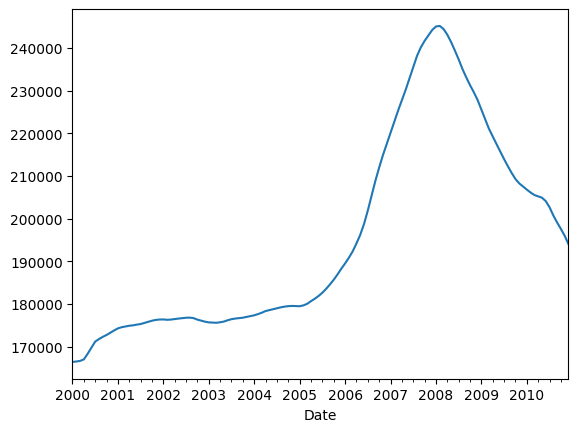

In [129]:
merged_data_multiindex.loc['Utah']['Median Home Price']['2000':'2010'].plot()

In [130]:
merged_data_multiindex.to_csv("Data_Files/state_full.csv")

<AxesSubplot: xlabel='Date'>

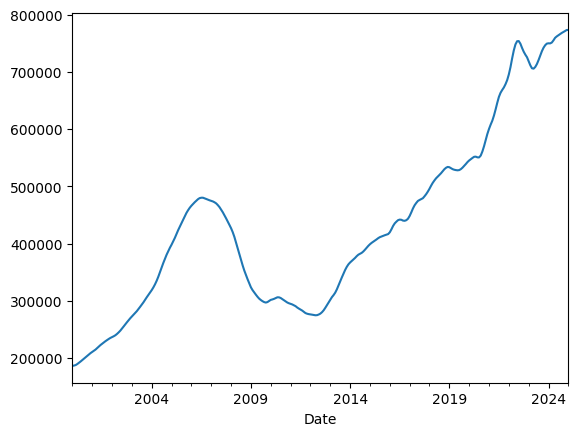

In [143]:
testing = pd.read_csv("Data_Files/state_full.csv", index_col=[0, 1])
testing.index = pd.MultiIndex.from_tuples(
    [(statefip, pd.to_datetime(date)) for statefip, date in testing.index],
    names=['statefip', 'Date']
)
testing.loc['California']['Median Home Price'].plot()